In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,12)})
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd  
import folium
import branca.colormap as cm

In [2]:
# Load full Data
df_full = pd.read_csv('data/processed/SimpleNNData.csv', index_col=0, parse_dates=[1])
weather_var = list(df_full.columns[-8:-1])
df_full

index  time_to_reservation  leave_fuel     degree  \
0      2019-09-01 00:00:00            10.836945          38  26.186523   
1      2019-09-01 00:00:00            10.142222          38  11.476456   
2      2019-09-01 00:00:00             0.511111          32   2.159959   
3      2019-09-01 00:00:00             1.473056          65   3.701779   
4      2019-09-01 00:00:00             0.001389          38  10.134994   
...                    ...                  ...         ...        ...   
155840 2019-10-31 23:00:00             7.881945          82  20.815263   
155841 2019-10-31 23:00:00            10.609167          50   6.382984   
155842 2019-10-31 23:00:00             5.751389          80   8.983153   
155843 2019-10-31 23:00:00             6.750000          90   7.502488   
155844 2019-10-31 23:00:00             8.620556          79  14.840284   

        weekend  Time_Cos  Time_Sin  hour_index  eng_118I  eng_COOPER  ...  \
0             1  0.999999  0.001309    6.702876         0           0  ...   
1             1  0.999994  0.003418    6.702876         1           0  ...   
2             1  0.999984  0.005600    6.702876         0           1  ...   
3             1  0.999982  0.006036    6.702876         0           0  ...   
4             1  0.999950  0.010035    6.702876         0           0  ...   
...         ...       ...       ...         ...       ...         ...  ...   
155840        0  0.988865 -0.148816    6.491208         1           0  ...   
155841        0  0.990258 -0.139245    6.491208         0           0  ...   
155842        0  0.990629 -0.136580    6.491208         0           0  ...   
155843        0  0.990797 -0.135355    6.491208         0           0  ...   
155844        0  0.990817 -0.135211    6.491208         0           0  ...   

        lz_185154  lz_185203  mean_temp  mean_wind_speed  acc_precip  \
0               0          0       22.4              3.6         2.4   
1               0          0       22.4              3.6         2.4   
2               0          0       22.4              3.6         2.4   
3               0          0       22.4              3.6         2.4   
4               0          0       22.4              3.6         2.4   
...           ...        ...        ...              ...         ...   
155840          0          0        6.6              2.1         0.0   
155841          0          0        6.6              2.1         0.0   
155842          0          0        6.6              2.1         0.0   
155843          0          0        6.6              2.1         0.0   
155844          0          0        6.6              2.1         0.0   

        bright_sunshine  mean_pressure  mean_relative_hum  mean_cloud_cover  \
0                   0.0         1010.4               80.0              87.0   
1                   0.0         1010.4               80.0              87.0   
2                   0.0         1010.4               80.0              87.0   
3                   0.0         1010.4               80.0              87.0   
4                   0.0         1010.4               80.0              87.0   
...                 ...            ...                ...               ...   
155840              0.0         1023.6               81.5              92.0   
155841              0.0         1023.6               81.5              92.0   
155842              0.0         1023.6               81.5              92.0   
155843              0.0         1023.6               81.5              92.0   
155844              0.0         1023.6               81.5              92.0   

        dist_to_station  
0            301.526776  
1           1366.555388  
2            534.529578  
3            441.981541  
4            396.658330  
...                 ...  
155840        96.125485  
155841       852.429991  
155842       250.915344  
155843       777.201178  
155844       770.456422  

[155843 rows x 276 columns]

## Time to Reservation

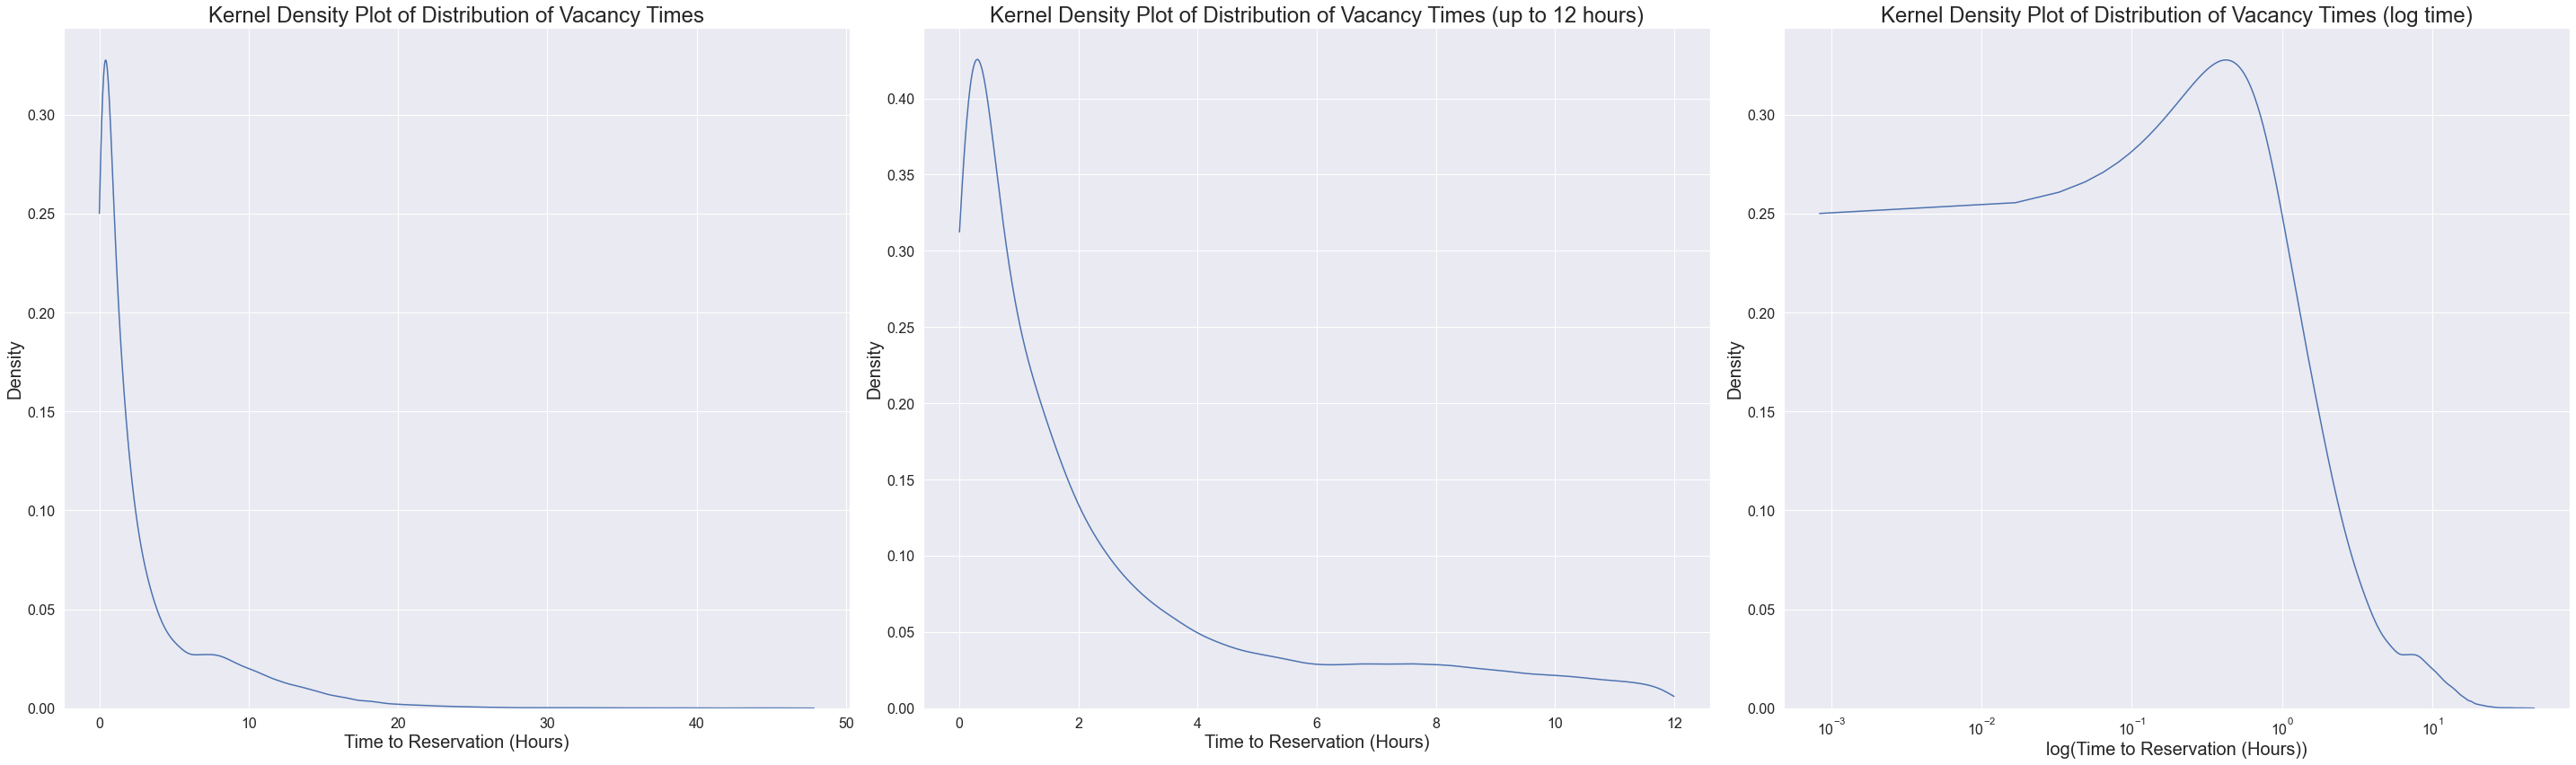

In [3]:
fig, axes = plt.subplots(1, 3,figsize=(40,12))
sns.kdeplot(data=df_full, x="time_to_reservation", cut = 0, ax=axes[0],gridsize=1500)
axes[0].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times",fontsize=24)
axes[0].set_xlabel('Time to Reservation (Hours)',fontsize=20)
axes[0].set_ylabel("Density",fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16)
sns.kdeplot(data=df_full[df_full.time_to_reservation <= 12], x="time_to_reservation", cut = 0, ax=axes[1],gridsize=1500)
axes[1].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times (up to 12 hours)",fontsize=24)
axes[1].set_xlabel('Time to Reservation (Hours)',fontsize=20)
axes[1].set_ylabel("Density",fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16)
sns.kdeplot(data=df_full, x="time_to_reservation", cut = 0 ,ax=axes[2],gridsize=3000)
axes[2].set(xscale = 'log')
axes[2].axes.set_title("Kernel Density Plot of Distribution of Vacancy Times (log time)",fontsize=24)
axes[2].set_xlabel('log(Time to Reservation (Hours))',fontsize=20)
axes[2].set_ylabel("Density",fontsize=20)
axes[2].tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Distribution.png')
plt.show()

In [4]:
axes[2].get_lines()[0].get_data()[0][12]

0.1922916008146552

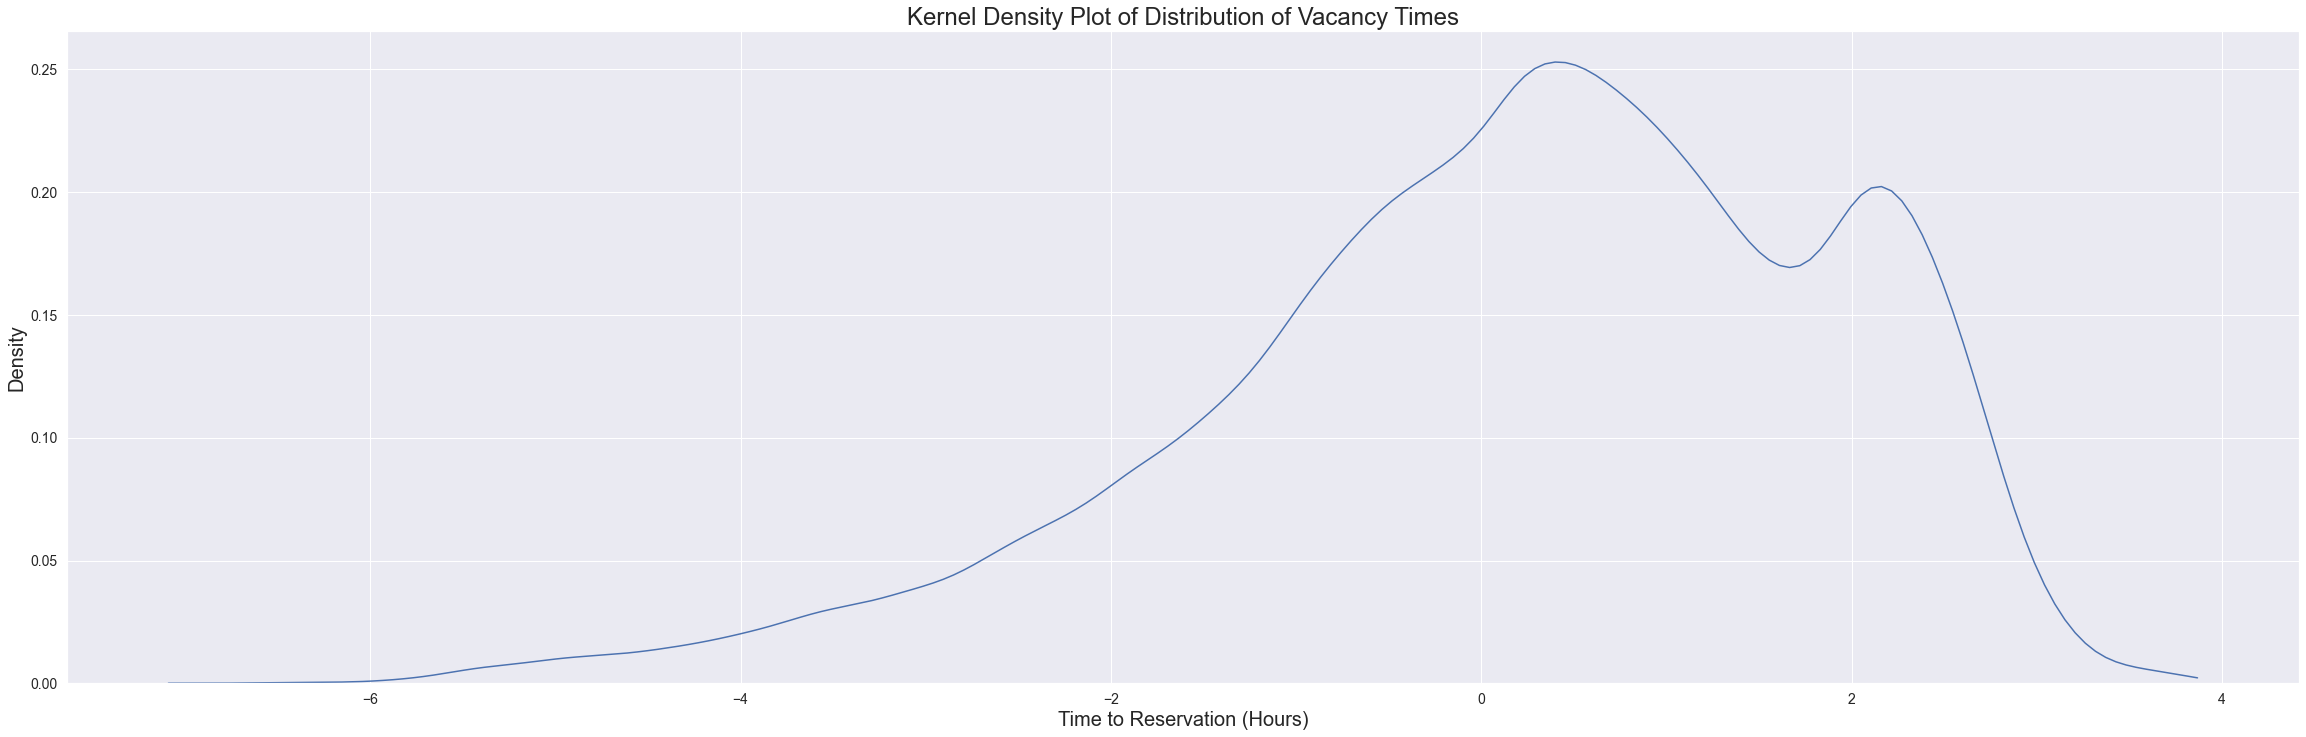

In [5]:
df_full['time_to_reservationT'] = np.log(df_full['time_to_reservation'])

fig, axes = plt.subplots(1, 1,figsize=(40,12))
sns.kdeplot(data=df_full, x="time_to_reservationT", cut = 0, ax=axes)
axes.axes.set_title("Kernel Density Plot of Distribution of Vacancy Times",fontsize=24)
axes.set_xlabel('Time to Reservation (Hours)',fontsize=20)
axes.set_ylabel("Density",fontsize=20)
axes.tick_params(axis='both', which='major', labelsize=14)

In [6]:
df_full.time_to_reservation.mean()

3.4030736399517094

In [7]:
df_full.time_to_reservation.std()

4.688914184588644

In [8]:
np.mean(df_full.time_to_reservation <= 12)

0.9363397778533524

In [9]:
df_full.time_to_reservation.quantile([0, 0.05, .25, .5, .75, 0.95,1])

0.00     0.000833
0.05     0.050833
0.25     0.449167
0.50     1.444167
0.75     4.394305
0.95    13.085528
1.00    47.849445
Name: time_to_reservation, dtype: float64

## Hour

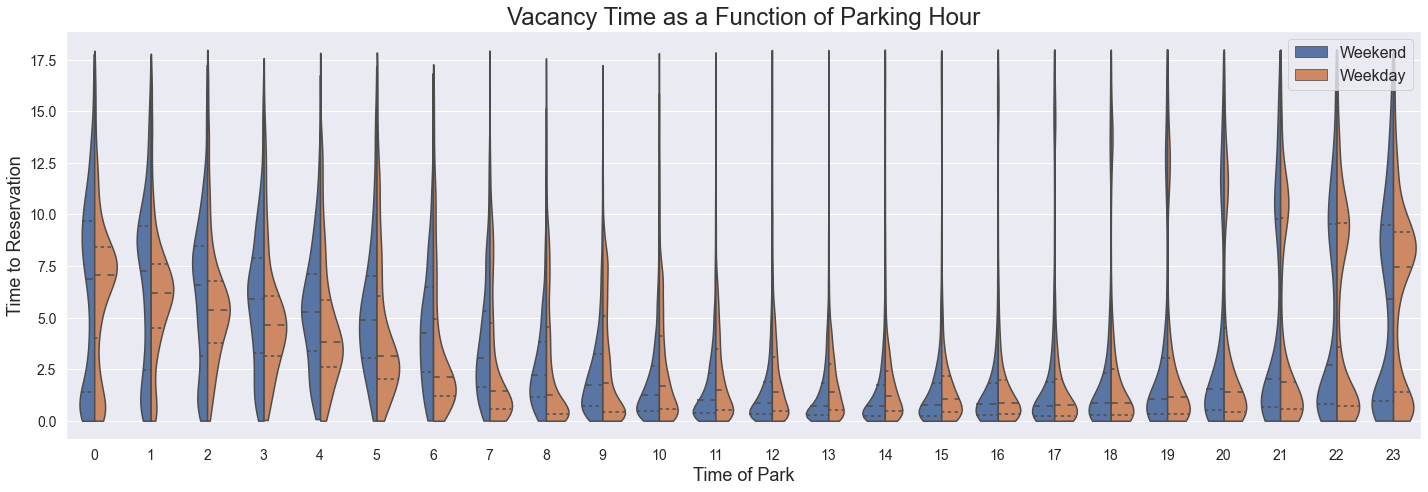

In [10]:
df_full['hour'] = df_full['index'].dt.round('H').dt.hour
f = plt.figure(figsize=(20,7))
ax = sns.violinplot(x = 'hour', y = 'time_to_reservation',  hue = 'weekend', cut = 0, split=True, inner = 'quartile', data =df_full[df_full.time_to_reservation<=18][['hour','time_to_reservation','weekend']].replace({'weekend': {0: 'Weekday', 1: 'Weekend'}}))
ax.axes.set_title("Vacancy Time as a Function of Parking Hour",fontsize=24)
ax.set_xlabel('Time of Park',fontsize=18)
ax.set_ylabel("Time to Reservation",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=16)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Hour.png')
plt.show()
df_full.drop(columns=['hour'], inplace = True)

In [11]:
df_full[['time_to_reservation', 'Time_Cos', 'Time_Sin']].corr()

time_to_reservation  Time_Cos  Time_Sin
time_to_reservation             1.000000  0.272403  0.035337
Time_Cos                        0.272403  1.000000 -0.236047
Time_Sin                        0.035337 -0.236047  1.000000

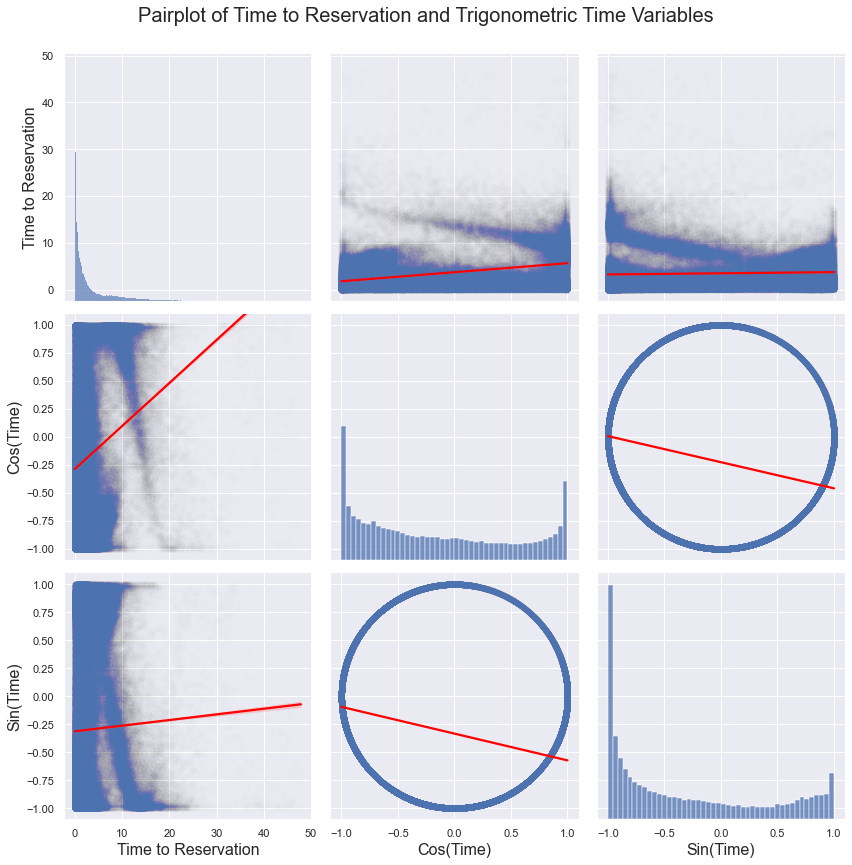

In [12]:
ax = sns.pairplot(df_full[['time_to_reservation', 'Time_Cos', 'Time_Sin']], kind="reg", height=4, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.005}})
ax.fig.suptitle("Pairplot of Time to Reservation and Trigonometric Time Variables", y=1.00, fontsize = 20)
ax.axes[0,0].set_ylabel('Time to Reservation', fontsize = 16)
ax.axes[1,0].set_ylabel('Cos(Time)', fontsize = 16)
ax.axes[2,0].set_ylabel('Sin(Time)', fontsize = 16)
ax.axes[2,0].set_xlabel('Time to Reservation', fontsize = 16)
ax.axes[2,1].set_xlabel('Cos(Time)', fontsize = 16)
ax.axes[2,2].set_xlabel('Sin(Time)', fontsize = 16)
ax.axes[1,0].set_ylim((-1.1,1.1))
ax.axes[1,1].set_xlabel((0,1))
ax.axes[1,2].set_xlabel((-1.1,1.1))
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/TrigTime.png')
plt.show()

## Fuel

In [13]:
# Lower leads to faster pick-up time. Maybe the effect of rewarding "fueling" works
df_full[['time_to_reservation', 'leave_fuel']].corr()

time_to_reservation  leave_fuel
time_to_reservation             1.000000    0.062254
leave_fuel                      0.062254    1.000000

In [14]:
(df_full[['time_to_reservation', 'leave_fuel']][df_full.leave_fuel<100]).corr()

time_to_reservation  leave_fuel
time_to_reservation             1.000000    0.015444
leave_fuel                      0.015444    1.000000

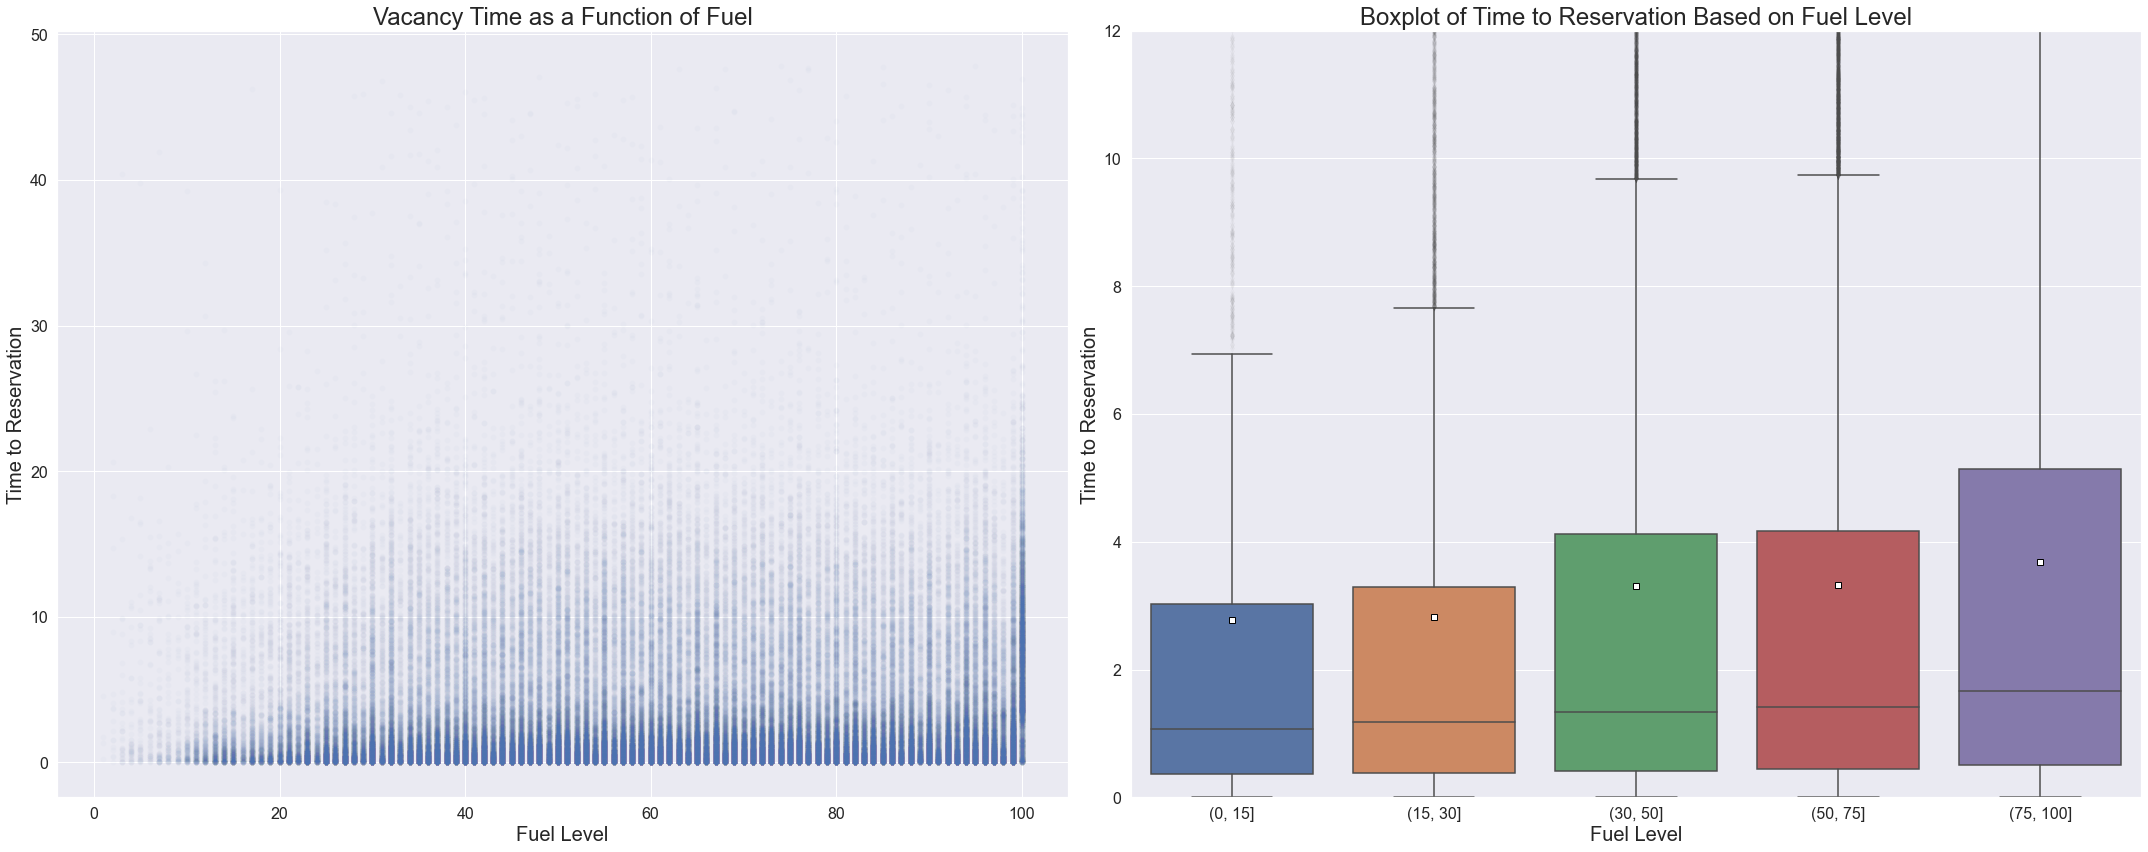

In [15]:
fig, axes = plt.subplots(1, 2,figsize=(30,12))
sns.scatterplot(x = 'leave_fuel', y ='time_to_reservation', data = df_full, alpha = 0.02, ax=axes[0])
axes[0].set_title("Vacancy Time as a Function of Fuel",fontsize=24)
axes[0].set_xlabel('Fuel Level',fontsize=20)
axes[0].set_ylabel("Time to Reservation",fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16)

df_full['Fuel_bin'] = pd.cut(df_full['leave_fuel'], [0,15,30,50,75,100])
sns.boxplot(x="Fuel_bin", y="time_to_reservation", data=df_full, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}, flierprops=dict(alpha=0.02))
axes[1].axes.set_title("Boxplot of Time to Reservation Based on Fuel Level",fontsize=24)
axes[1].set_xlabel('Fuel Level',fontsize=20)
axes[1].set_ylabel("Time to Reservation",fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16)
axes[1].set_ylim((0,12))

plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Fuel.png')
plt.show()
df_full.drop(columns=['Fuel_bin'], inplace = True)

## Engine + Weekend

In [16]:
Engine_Weekend_df = pd.concat([df_full.filter(regex = 'eng').idxmax(axis = 1),df_full[['time_to_reservation','weekend']]], axis = 1).rename(columns = {0:'Engine'})
Engine_Weekend_df['weekend'] = Engine_Weekend_df['weekend'].replace({0: 'Weekday', 1: 'Weekend'})

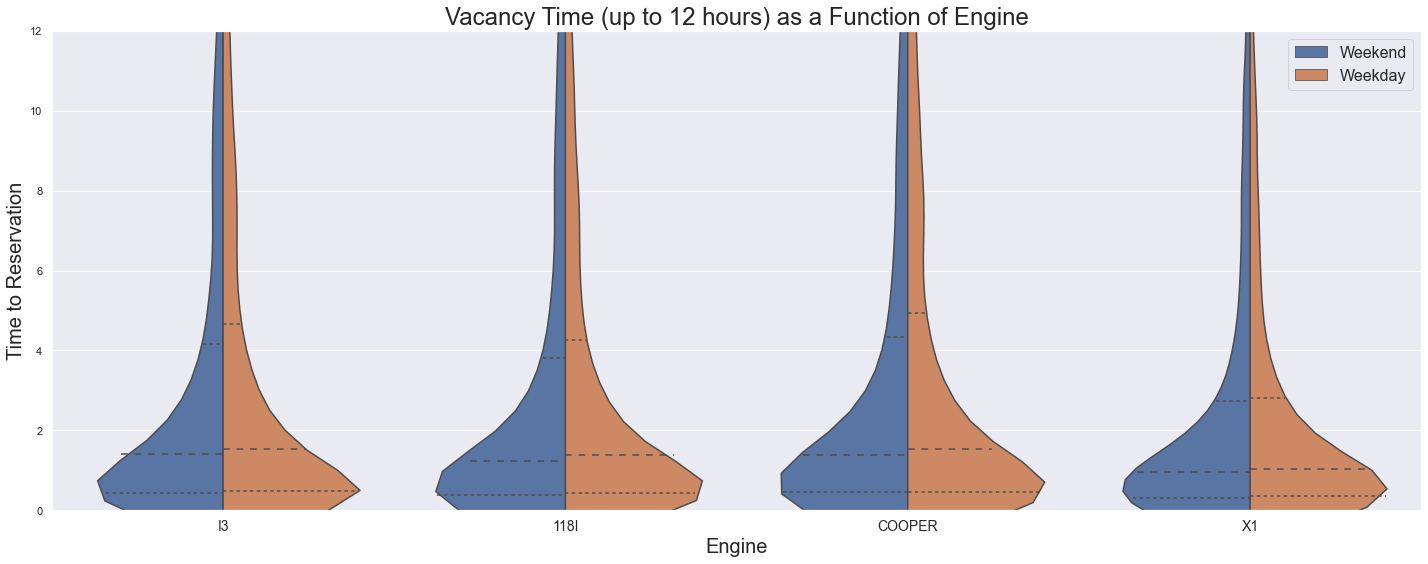

In [17]:
f = plt.figure(figsize=(20,8))
ax = sns.violinplot(x = 'Engine', y = 'time_to_reservation', hue = 'weekend',  split=True,data = Engine_Weekend_df, inner = 'quartile')
ax.axes.set_title("Vacancy Time (up to 12 hours) as a Function of Engine",fontsize=24)
ax.set_xlabel('Engine',fontsize=20)
ax.set_ylabel("Time to Reservation",fontsize=20)
ax.legend(fontsize=16)
ax.set_xticklabels([x.get_text()[4:] for x in ax.get_xticklabels()], fontsize=14)
ax.set(ylim=(0,12))
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Engine.png')
plt.show()

In [18]:
Engine_Weekend_df.pivot_table(index = 'Engine', columns = 'weekend', values = 'time_to_reservation')
# Price differentation

weekend      Weekday   Weekend
Engine                        
eng_118I    3.305864  3.196602
eng_COOPER  3.637338  3.476430
eng_I3      3.474396  3.421049
eng_X1      2.446813  2.405058

## Degree

In [19]:
# More cars close
df_full[['time_to_reservation', 'degree']].corr()

time_to_reservation    degree
time_to_reservation             1.000000  0.103522
degree                          0.103522  1.000000

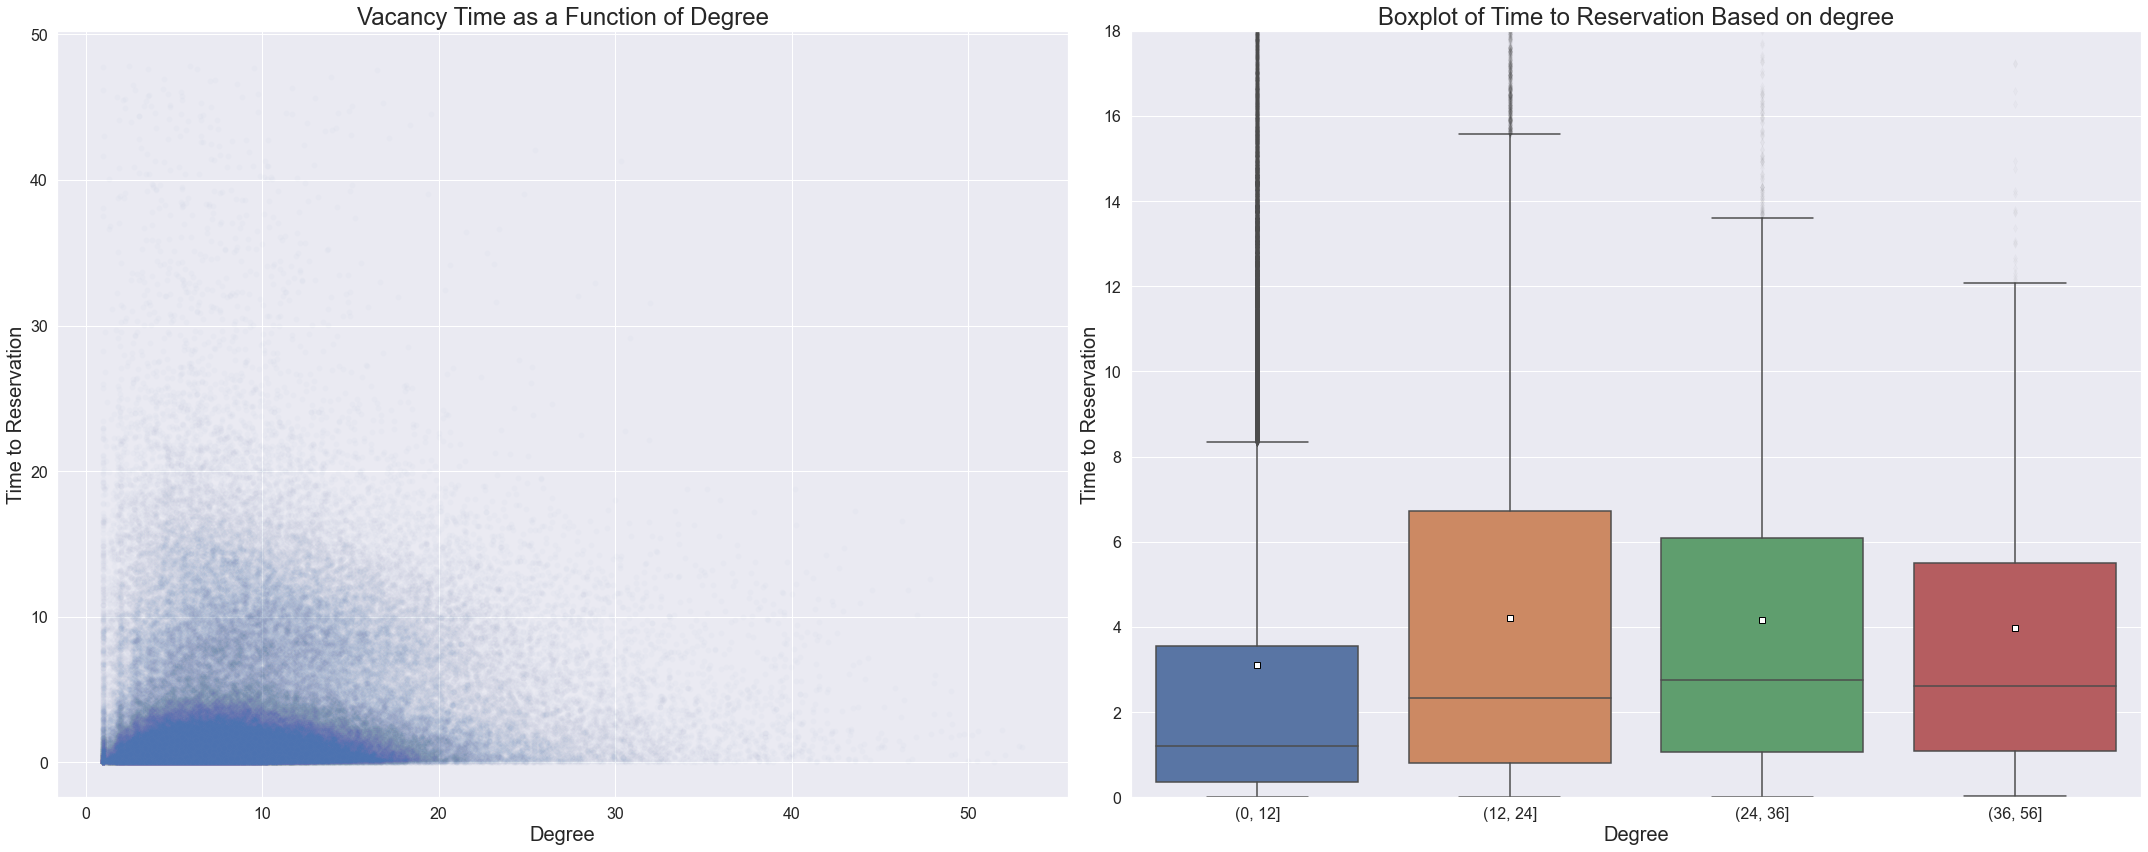

In [20]:
fig, axes = plt.subplots(1, 2,figsize=(30,12))
sns.scatterplot(x = 'degree', y ='time_to_reservation', data = df_full, alpha = 0.02, ax=axes[0])
axes[0].set_title("Vacancy Time as a Function of Degree",fontsize=24)
axes[0].set_xlabel('Degree',fontsize=20)
axes[0].set_ylabel("Time to Reservation",fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16)

df_full['Degree_bin'] = pd.cut(df_full['degree'], [0,12,24,36,56])
sns.boxplot(x="Degree_bin", y="time_to_reservation", data=df_full, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}, flierprops=dict(alpha=0.02))
axes[1].axes.set_title("Boxplot of Time to Reservation Based on degree",fontsize=24)
axes[1].set_xlabel('Degree',fontsize=20)
axes[1].set_ylabel("Time to Reservation",fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16)
axes[1].set_ylim((0,18))

plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/Degree.png')
plt.show()
df_full.drop(columns=['Degree_bin'], inplace = True)

## Zone

In [21]:
Zone_df = pd.concat([df_full.filter(regex = 'lz').idxmax(axis = 1),df_full[['time_to_reservation','degree']]], axis = 1).rename(columns = {0:'Zone'})
Zone_df.Zone.value_counts().describe()

count     256.000000
mean      608.761719
std       570.930278
min        30.000000
25%       261.750000
50%       491.000000
75%       751.250000
max      4915.000000
Name: Zone, dtype: float64

In [22]:
ZoneID_dict = dict(iter(Zone_df.groupby('Zone')))
Zone_average = pd.Series({Zone: sub_df.time_to_reservation.mean() for Zone, sub_df in ZoneID_dict.items()}).sort_values()
Zone_average.describe()

count    256.000000
mean       4.017666
std        1.828414
min        0.834815
25%        2.823704
50%        3.713179
75%        4.884891
max        9.820948
dtype: float64

[]

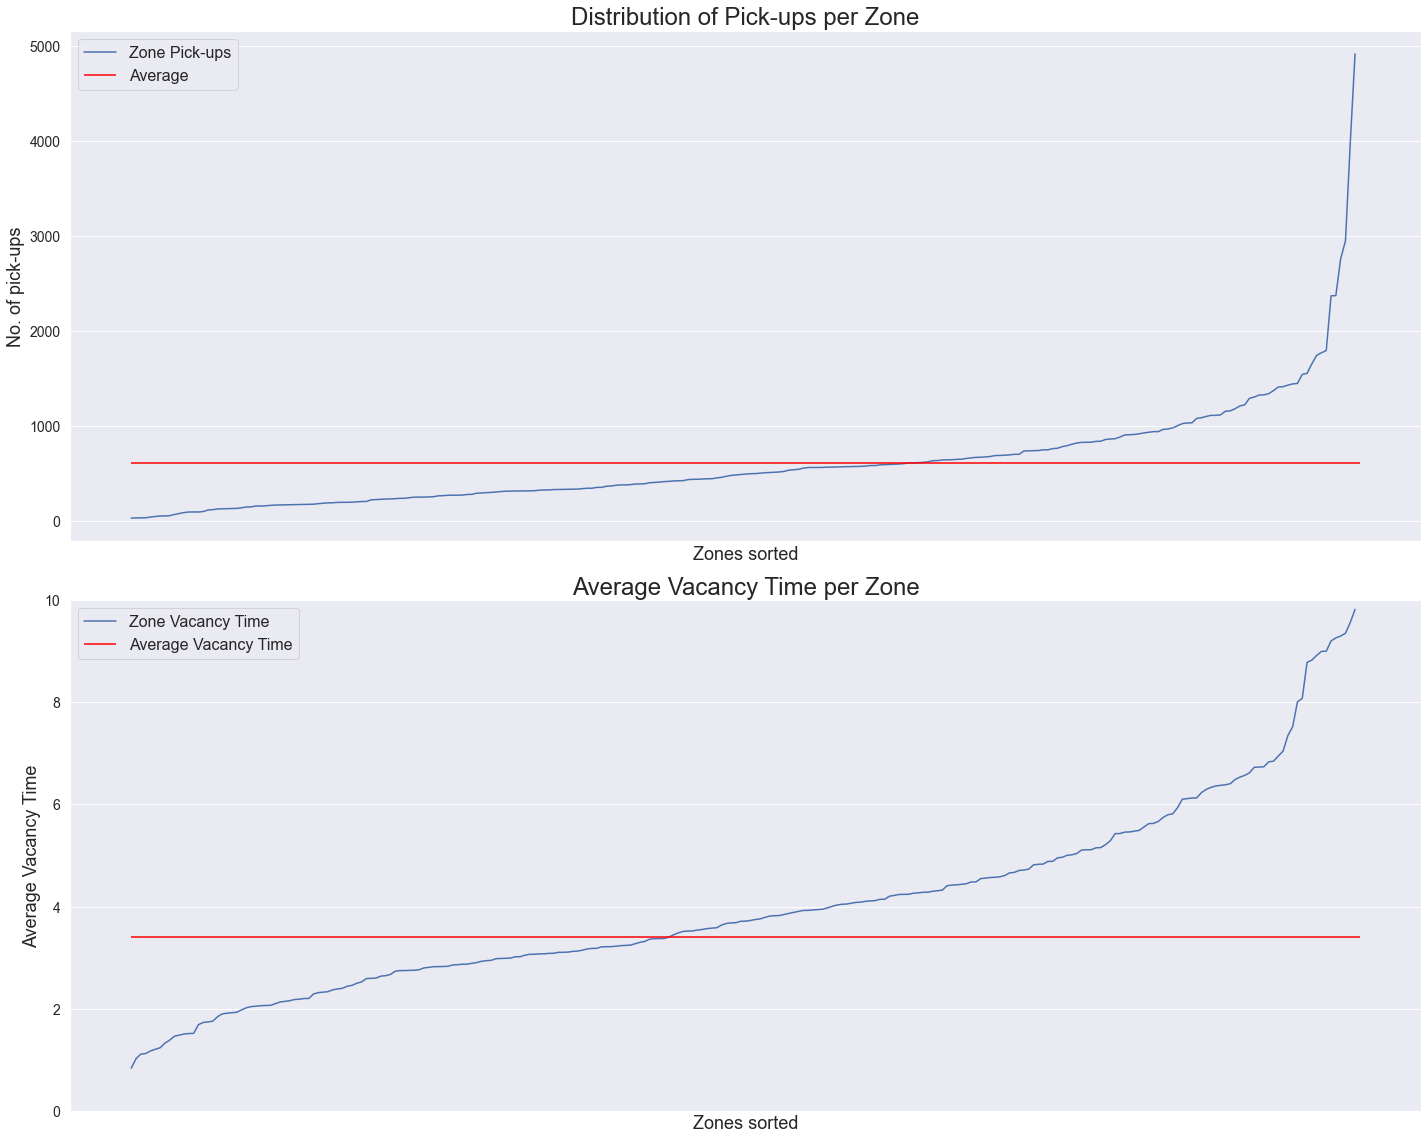

In [23]:
fig, axes = plt.subplots(2, 1,figsize=(20,16))
Zone_df.Zone.value_counts().sort_values(ascending = True).plot(label = 'Zone Pick-ups', ax = axes[0])
axes[0].hlines(y = Zone_df.Zone.value_counts().sort_values(ascending = True).mean(),xmin = 0, xmax=Zone_df.Zone.nunique(), colors = 'red', label = 'Average')
axes[0].set_title("Distribution of Pick-ups per Zone",fontsize=24)
axes[0].set_xlabel('Zones sorted',fontsize=18)
axes[0].set_ylabel("No. of pick-ups",fontsize=18)
axes[0].set_xticks([])
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].legend(fontsize = 16)

axes[1] = Zone_average.plot(label = 'Zone Vacancy Time')
axes[1].hlines(y=df_full.time_to_reservation.mean(),xmin = 0, xmax=Zone_df.Zone.nunique(), colors = 'red', label = 'Average Vacancy Time')
axes[1].set_title("Average Vacancy Time per Zone",fontsize=24)
axes[1].set_xlabel('Zones sorted',fontsize=18)
axes[1].set_ylabel("Average Vacancy Time",fontsize=18)
axes[1].set_xticks([])
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylim(0,10)
plt.legend(fontsize = 16, loc = 0)

fig.tight_layout()
plt.savefig('../TeX/graphics/4Data/DegreeVacancyZones.png')
plt.plot()

In [24]:
df_zone_PV_corr = pd.concat([Zone_average.rename('Vacancy'), Zone_df.Zone.value_counts().rename('Pick-ups')], axis = 1)
df_zone_PV_corr.corr()

Vacancy  Pick-ups
Vacancy   1.000000 -0.359813
Pick-ups -0.359813  1.000000

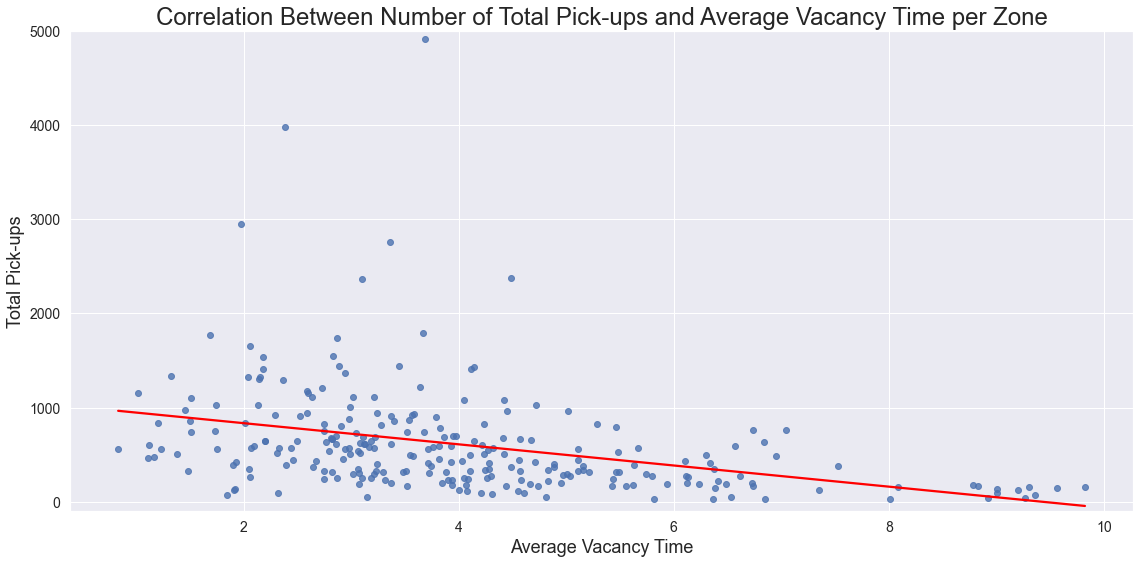

In [25]:
f = plt.figure(figsize=(16,8))
ax = sns.regplot(x = 'Vacancy', y ='Pick-ups', ci = None, data = df_zone_PV_corr, line_kws = {'color':'red'})
ax.axes.set_title("Correlation Between Number of Total Pick-ups and Average Vacancy Time per Zone",fontsize=24)
ax.set_xlabel('Average Vacancy Time',fontsize=18)
ax.set_ylabel("Total Pick-ups",fontsize=18)
ax.set_ylim(-100,5000)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/ZonePickupVacancyAverage.png')
plt.show()

In [26]:
Zone_time = Zone_df.groupby('Zone').mean().sort_values(by = 'time_to_reservation')
Zone_time['Count'] = Zone_time.index.map(dict(Zone_df.Zone.value_counts()))

In [27]:
# Zone + degree
Deg_corr_Zone = pd.Series({Zone: sub_df[['time_to_reservation','degree']].corr().iloc[0,1] for Zone, sub_df in ZoneID_dict.items()})

[]

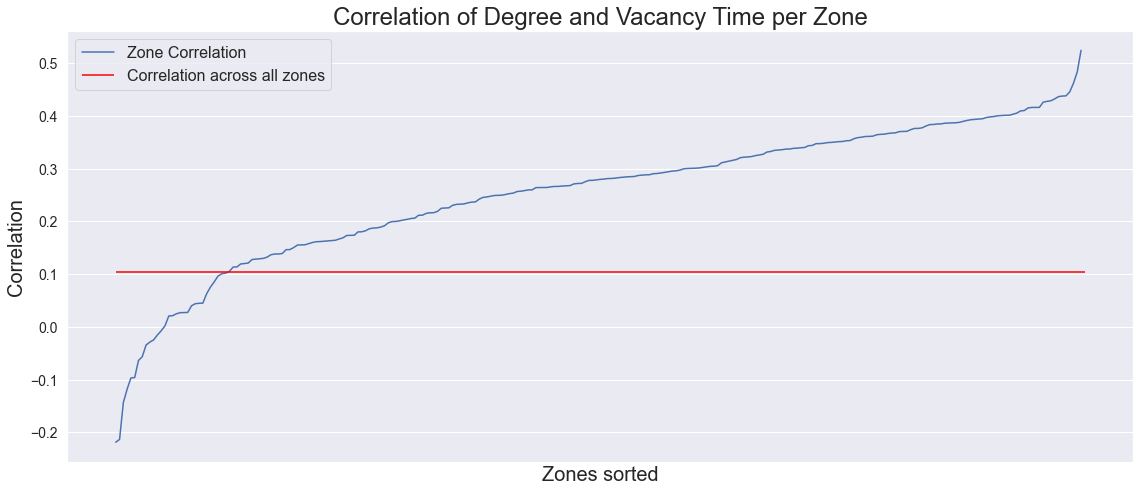

In [28]:
fig = plt.figure(figsize=(16,7))
Deg_corr_Zone.sort_values().plot(label = 'Zone Correlation')
ax = plt.hlines(y=df_full[['time_to_reservation', 'degree']].corr().iloc[0,1],xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Correlation across all zones')
ax.axes.set_title("Correlation of Degree and Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=20)
ax.axes.set_ylabel("Correlation",fontsize=20)
ax.axes.set_xticks([])
ax.axes.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/DegreeWithinZones.png')
plt.plot()

In [29]:
# Number of zones with stronger correlation
np.sum(Deg_corr_Zone.values > df_full[['time_to_reservation', 'degree']].corr().iloc[0,1])

226

In [30]:
# Number of zones with stronger netaive correlation
np.sum(Deg_corr_Zone.values < -df_full[['time_to_reservation', 'degree']].corr().iloc[0,1])

4

In [31]:
avg_dict = {int(z[3:]): avg for z,avg in dict(Zone_average).items()}

gdf = gpd.read_file("../Zonekort/LTM_Zone3/zones_level3.shp").to_crs(epsg=4326)
gdf['Avg_Zone'] = gdf.zoneid.map(avg_dict)
gdf = gdf[~gdf.Avg_Zone.isna()]
gdf

OBJECTID  komnr  zoneid                 zonenavn  \
367       7464    147  147131    Frederiksberg Øst S Ø   
427       6581    101  102122               Amagertorv   
428       6582    101  102325            Svanemøllen V   
483       6660    101  102222            Amalienborg Ø   
484       6661    101  102863            Kgs Enghave N   
...        ...    ...     ...                      ...   
3664     11339    101  102454        Ydre Nørrebro VSV   
3665     11340    101  102852                Sydhavn V   
3666     11379    157  157262  Jægersborg-Vangede Midt   
3667     11400    169  169042  Høje Taastrup Station S   
3669     11414    173  173061         Lyngby C+Vest NØ   

                                          zonedescri  numadresse  \
367                            Frederiksberg Kommune         296   
427   Københavns Kommune, indre by og Christianshavn         506   
428                          Københavns Kommune Nord         326   
483   Københavns Kommune, indre by og Christianshavn         577   
484         Københavns Kommune syd for Frederiksberg         457   
...                                              ...         ...   
3664                         Københavns Kommune Nord         186   
3665        Københavns Kommune syd for Frederiksberg         274   
3666                                Gentofte Kommune         142   
3667                           Høje Taastrup Kommune         172   
3669                          Lyngby-Taarbæk Kommune          51   

        Shape_Leng    Shape_Area  \
367    2146.936913  2.272174e+05   
427    1651.615236  1.596530e+05   
428    1835.852414  2.050950e+05   
483   11296.760990  4.286966e+05   
484    3688.931740  5.227625e+05   
...            ...           ...   
3664   1718.362472  1.809837e+05   
3665   2537.945040  2.286231e+05   
3666   2176.893379  2.351585e+05   
3667   4554.836303  1.127119e+06   
3669   2305.023924  2.337766e+05   

                                               geometry  Avg_Zone  
367   POLYGON ((12.54521 55.67558, 12.54716 55.67512...  2.018344  
427   POLYGON ((12.57804 55.68069, 12.57817 55.68060...  1.110909  
428   POLYGON ((12.57741 55.70910, 12.57735 55.70909...  3.370640  
483   MULTIPOLYGON (((12.58925 55.68615, 12.59628 55...  1.730453  
484   POLYGON ((12.53414 55.64901, 12.53370 55.64868...  3.223228  
...                                                 ...       ...  
3664  POLYGON ((12.54180 55.69329, 12.54090 55.69239...  3.972346  
3665  POLYGON ((12.53904 55.65353, 12.53943 55.65236...  3.169994  
3666  POLYGON ((12.51968 55.75631, 12.52216 55.75375...  2.288656  
3667  POLYGON ((12.28177 55.64188, 12.28176 55.64185...  7.043658  
3669  POLYGON ((12.51075 55.77281, 12.51375 55.77168...  4.885730  

[256 rows x 10 columns]

In [32]:
# Colormap
#cmap = matplotlib.cm.get_cmap('viridis')
cmap = cm.LinearColormap(colors=['green','yellow','red'], index=[min(gdf['Avg_Zone']),4,max(gdf['Avg_Zone'])],vmin=min(gdf['Avg_Zone']),vmax=max(gdf['Avg_Zone']), caption = 'Average Vacancy Time')

# Map
m = folium.Map(location=[55.679, 12.568337], zoom_start=12, prefer_canvas=True, width=1950,height=1200)

for i,(_, r) in enumerate(gdf[~gdf.Avg_Zone.isna()].iterrows()):
    sim_geo = gpd.GeoDataFrame(r[['geometry','Avg_Zone']]).T
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'color': matplotlib.colors.rgb2hex(cmap(x['properties']['Avg_Zone'])), 'fillOpacity': 0.6})

    geo_j.add_to(m)

m.add_child(cmap)
folium.map.LayerControl('topleft', collapsed=True).add_to(m)

#m.save('../TeX/graphics/4Data/ZoneVacancy.html')

m

## Stations

In [33]:
df_full[['time_to_reservation', 'dist_to_station']].corr() #Look into zone split 

time_to_reservation  dist_to_station
time_to_reservation             1.000000         0.129333
dist_to_station                 0.129333         1.000000

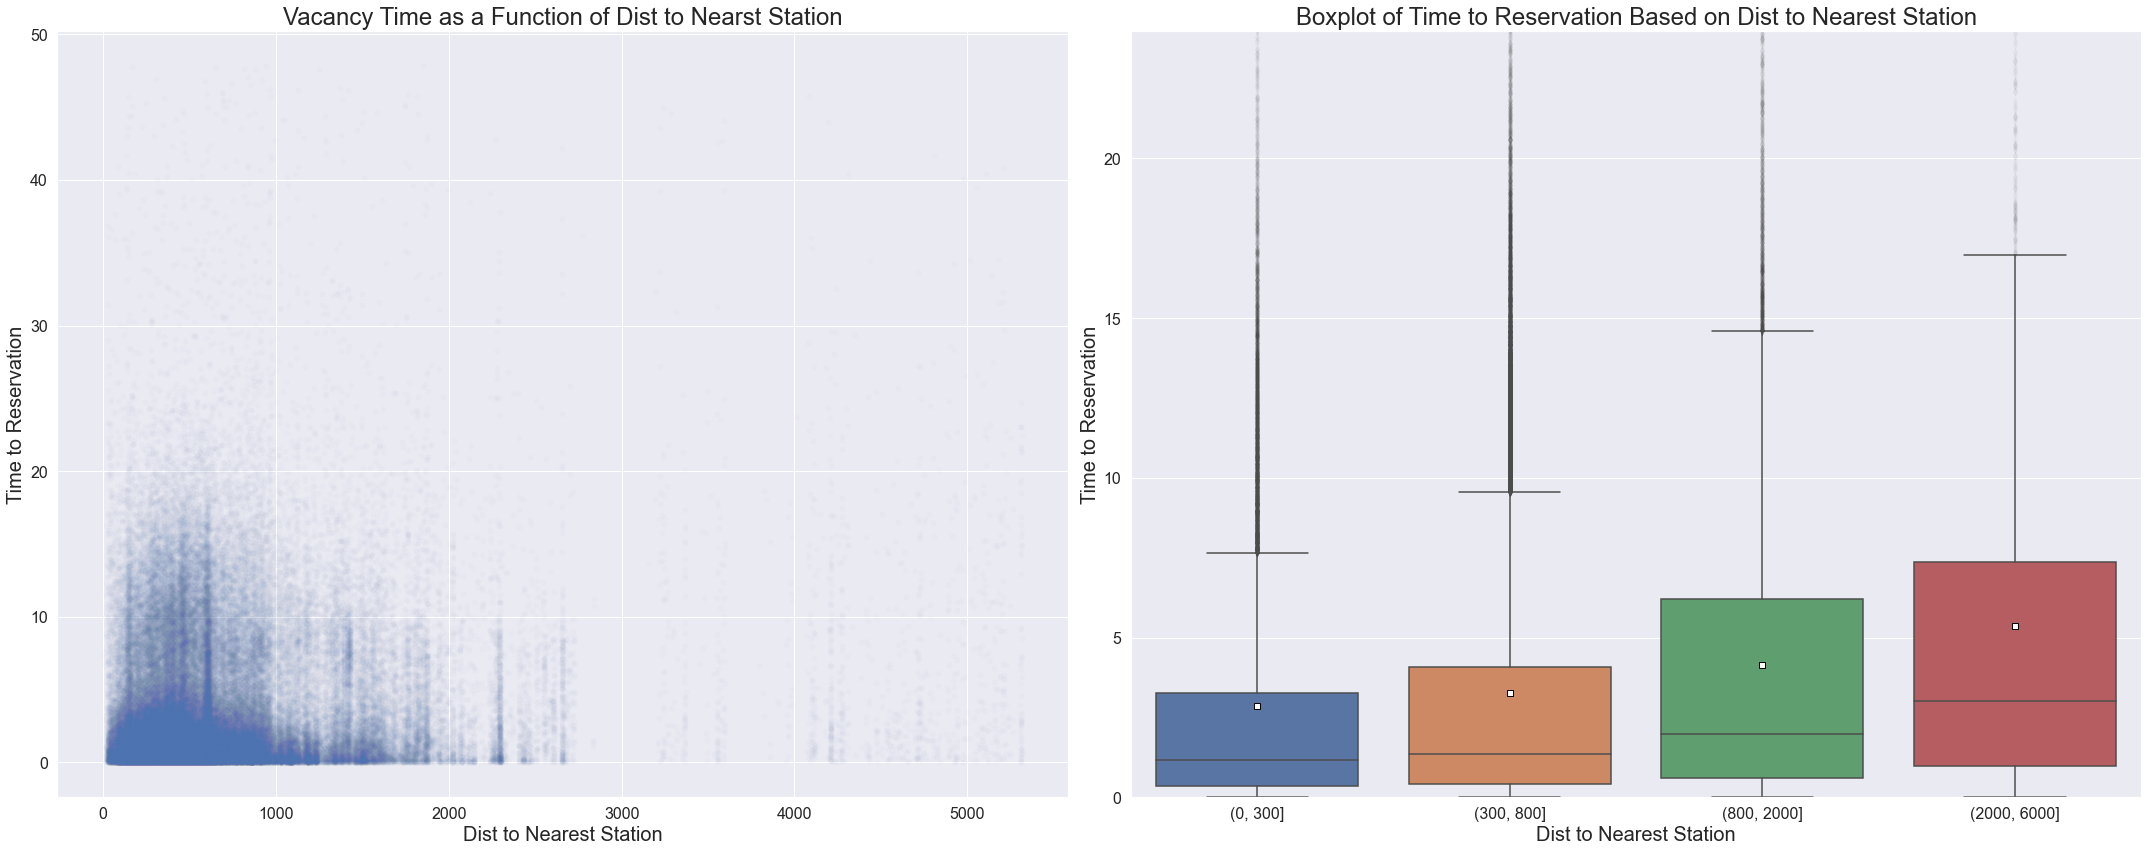

(300, 800]      83444
(0, 300]        36191
(800, 2000]     32309
(2000, 6000]     3899
Name: Dist_bin, dtype: int64


In [34]:
fig, axes = plt.subplots(1, 2,figsize=(30,12))
sns.scatterplot(x = 'dist_to_station', y ='time_to_reservation', data = df_full, alpha = 0.02, ax = axes[0])
axes[0].set_title("Vacancy Time as a Function of Dist to Nearst Station",fontsize=24)
axes[0].set_xlabel('Dist to Nearest Station',fontsize=20)
axes[0].set_ylabel("Time to Reservation",fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16)

df_full['Dist_bin'] = pd.cut(df_full['dist_to_station'], [0,300,800,2000,6000])
sns.boxplot(x="Dist_bin", y="time_to_reservation", data=df_full, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}, flierprops=dict(alpha=0.02))
axes[1].axes.set_title("Boxplot of Time to Reservation Based on Dist to Nearest Station",fontsize=24)
axes[1].set_xlabel('Dist to Nearest Station',fontsize=20)
axes[1].set_ylabel("Time to Reservation",fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16)
axes[1].set_ylim((0,24))

plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/DistStation.png')
plt.show()
print(df_full['Dist_bin'].value_counts())
df_full.drop(columns = ['Dist_bin'], inplace=True)

In [35]:
# Zone + dist
Zone_df = pd.concat([df_full.filter(regex = 'lz').idxmax(axis = 1),df_full[['time_to_reservation','dist_to_station']]], axis = 1).rename(columns = {0:'Zone'})
ZoneID_dict = dict(iter(Zone_df.groupby('Zone')))
Dist_corr_Zone = pd.Series({Zone: sub_df[['time_to_reservation','dist_to_station']].corr().iloc[0,1] for Zone, sub_df in ZoneID_dict.items()})

[]

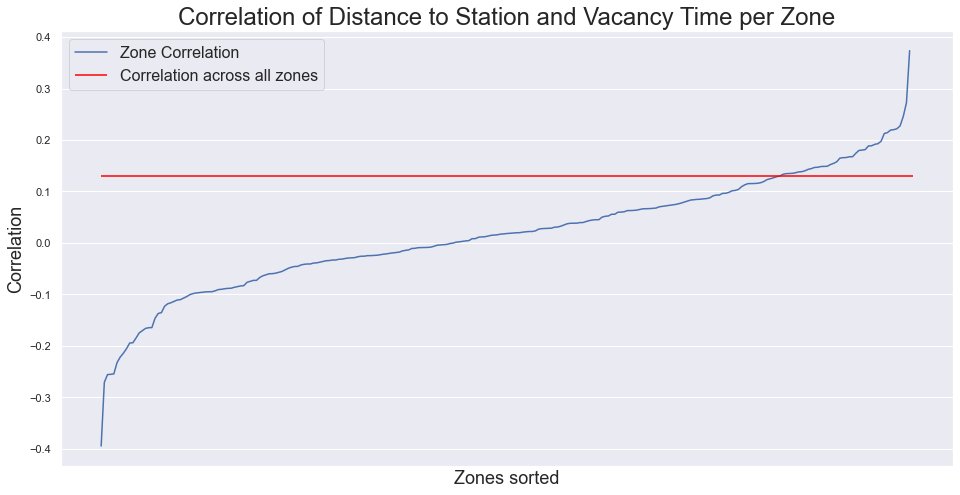

In [36]:
f = plt.figure(figsize=(16,8))
Dist_corr_Zone.sort_values().plot(label = 'Zone Correlation')
ax = plt.hlines(y=df_full[['time_to_reservation', 'dist_to_station']].corr().iloc[0,1],xmin = 0, xmax=len(Deg_corr_Zone), colors = 'red', label = 'Correlation across all zones')
ax.axes.set_title("Correlation of Distance to Station and Vacancy Time per Zone",fontsize=24)
ax.axes.set_xlabel('Zones sorted',fontsize=18)
ax.axes.set_ylabel("Correlation",fontsize=18)
ax.axes.set_xticks([])
plt.legend(fontsize = 16)
plt.plot()

## Weather

Correlation matrices

In [37]:
print(pd.read_csv('data/processed/weather.csv', index_col=0).describe().to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  mean\_temp &  mean\_wind\_speed &  acc\_precip &  bright\_sunshine &  mean\_pressure &  mean\_relative\_hum &  mean\_cloud\_cover \\
\midrule
count &    1466.00 &          1466.00 &     1466.00 &          1466.00 &        1466.00 &            1466.00 &           1466.00 \\
mean  &      12.09 &             3.68 &        0.14 &             8.82 &        1012.87 &              82.78 &             61.15 \\
std   &       3.63 &             1.92 &        0.60 &            17.60 &           8.33 &              11.85 &             37.34 \\
min   &      -1.30 &             0.10 &        0.00 &             0.00 &         987.30 &              45.00 &              0.00 \\
25\%   &      10.40 &             2.30 &        0.00 &             0.00 &        1006.90 &              74.72 &             22.00 \\
50\%   &      12.60 &             3.60 &        0.00 &             0.00 &        1012.90 &              84.80 &             78.00 \\
75\%   &      14.30 &  

In [38]:
def df_autocorr(df, lag=1, axis=0):
    """Compute full-sample column-wise autocorrelation for a DataFrame."""
    return df.apply(lambda col: col.autocorr(lag), axis=axis)

df_autocorr(pd.read_csv('data/processed/weather.csv', index_col=0))

mean_temp            0.984206
mean_wind_speed      0.953365
acc_precip           0.573708
bright_sunshine      0.804702
mean_pressure        0.998409
mean_relative_hum    0.954784
mean_cloud_cover     0.819494
dtype: float64

In [39]:
df_full[['time_to_reservation']+weather_var].corr()

time_to_reservation  mean_temp  mean_wind_speed  \
time_to_reservation             1.000000  -0.098912        -0.080746   
mean_temp                      -0.098912   1.000000         0.309871   
mean_wind_speed                -0.080746   0.309871         1.000000   
acc_precip                     -0.006526   0.031216         0.062897   
bright_sunshine                -0.111872   0.142481         0.142249   
mean_pressure                   0.007610  -0.151770        -0.210845   
mean_relative_hum               0.079268  -0.164189        -0.316063   
mean_cloud_cover               -0.010242   0.141419         0.046696   

                     acc_precip  bright_sunshine  mean_pressure  \
time_to_reservation   -0.006526        -0.111872       0.007610   
mean_temp              0.031216         0.142481      -0.151770   
mean_wind_speed        0.062897         0.142249      -0.210845   
acc_precip             1.000000        -0.134334      -0.221008   
bright_sunshine       -0.134334         1.000000       0.206145   
mean_pressure         -0.221008         0.206145       1.000000   
mean_relative_hum      0.252879        -0.475168      -0.349874   
mean_cloud_cover       0.222659        -0.547722      -0.254170   

                     mean_relative_hum  mean_cloud_cover  
time_to_reservation           0.079268         -0.010242  
mean_temp                    -0.164189          0.141419  
mean_wind_speed              -0.316063          0.046696  
acc_precip                    0.252879          0.222659  
bright_sunshine              -0.475168         -0.547722  
mean_pressure                -0.349874         -0.254170  
mean_relative_hum             1.000000          0.380713  
mean_cloud_cover              0.380713          1.000000

In [40]:
print(df_full[['time_to_reservation']+weather_var].corr().to_latex(float_format="%.4f"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  time\_to\_reservation &  mean\_temp &  mean\_wind\_speed &  acc\_precip &  bright\_sunshine &  mean\_pressure &  mean\_relative\_hum &  mean\_cloud\_cover \\
\midrule
time\_to\_reservation &               1.0000 &    -0.0989 &          -0.0807 &     -0.0065 &          -0.1119 &         0.0076 &             0.0793 &           -0.0102 \\
mean\_temp           &              -0.0989 &     1.0000 &           0.3099 &      0.0312 &           0.1425 &        -0.1518 &            -0.1642 &            0.1414 \\
mean\_wind\_speed     &              -0.0807 &     0.3099 &           1.0000 &      0.0629 &           0.1422 &        -0.2108 &            -0.3161 &            0.0467 \\
acc\_precip          &              -0.0065 &     0.0312 &           0.0629 &      1.0000 &          -0.1343 &        -0.2210 &             0.2529 &            0.2227 \\
bright\_sunshine     &              -0.1119 &     0.1425 &           0.1422 &     -0.1343 &           1.0000 

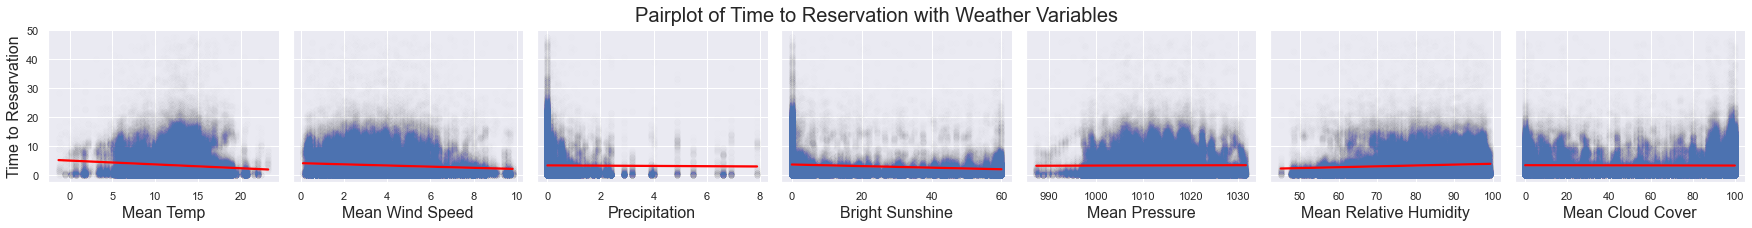

In [41]:
ax = sns.pairplot(df_full, y_vars=['time_to_reservation'], x_vars=weather_var, kind = 'reg', height = 3.5, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.004}})
ax.fig.suptitle("Pairplot of Time to Reservation with Weather Variables", y=0.9, fontsize = 20)
ax.axes[0,0].set_ylabel('Time to Reservation', fontsize = 16)
ax.axes[0,0].set_xlabel('Mean Temp', fontsize = 16)
ax.axes[0,1].set_xlabel('Mean Wind Speed', fontsize = 16)
ax.axes[0,2].set_xlabel('Precipitation', fontsize = 16)
ax.axes[0,3].set_xlabel('Bright Sunshine', fontsize = 16)
ax.axes[0,4].set_xlabel('Mean Pressure', fontsize = 16)
ax.axes[0,5].set_xlabel('Mean Relative Humidity', fontsize = 16)
ax.axes[0,6].set_xlabel('Mean Cloud Cover', fontsize = 16)
plt.tight_layout()
plt.savefig('../TeX/graphics/4Data/WeatherCorr.png')
plt.show()